# Zelp Project for Detecting Animal Activities
 workflow stages
1. Exploratory data analysis
2. Introducing 4 possible ways to solve the varying time frequency problem 
3. Creating the constant feature vector 
4. Transforming the imbalanced dataset into a balanced dataset 
5. Classical machine learning models
6. Deep learning models
7. Conclusion and future improvements

In [3]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#machine learning tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#deep learning
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras




# PART 1 - Exploratory Data Analysis


Let's have a look at the entire dataset first.

In [4]:
dataset= pd.read_csv("../input/zelpactivitytrainassignment/train_imu.csv",parse_dates=["datetime"])
dataset

,Ax,Ay,Az,Gx,Gy,Gz,datetime,labels
0,1072,16632,1100,-38,32,-61,2020-11-05 10:45:24,0
1,832,16696,1076,-32,57,-18,2020-11-05 10:45:24,0
2,908,16544,948,-31,3,-40,2020-11-05 10:45:24,0
3,1024,16592,1128,-19,51,-39,2020-11-05 10:45:24,0
4,936,16512,1064,-31,1,-38,2020-11-05 10:45:24,0
...,...,...,...,...,...,...,...,...
2180486,14788,344,8888,-36,14,-37,2020-11-11 10:38:48,0
2180487,14644,364,8840,-34,13,-37,2020-11-11 10:38:49,0
2180488,14732,380,8852,-36,13,-35,2020-11-11 10:38:49,0
2180489,14772,408,8904,-34,15,-38,2020-11-11 10:38:49,0


Let's check the descriptive statistics for the dataset

In [17]:
dataset.describe()

,Ax,Ay,Az,Gx,Gy,Gz,labels
count,2.180491e+06,2.180491e+06,2.180491e+06,2.180491e+06,2.180491e+06,2.180491e+06,2.180491e+06
mean,7.607039e+03,3.476802e+02,-1.223376e+04,-3.230329e+01,1.370142e+01,-3.878491e+01,2.912349e-01
std,4.291678e+03,2.931240e+03,2.461561e+03,1.587503e+02,1.200173e+02,2.108891e+02,5.268866e-01
min,-3.276800e+04,-3.276800e+04,-3.276800e+04,-1.240200e+04,-6.477000e+03,-9.914000e+03,0.000000e+00
25%,5.788000e+03,-9.080000e+02,-1.371200e+04,-4.900000e+01,4.000000e+00,-5.600000e+01,0.000000e+00
50%,9.388000e+03,2.720000e+02,-1.208400e+04,-3.200000e+01,1.400000e+01,-3.900000e+01,0.000000e+00
75%,1.049200e+04,1.524000e+03,-1.122400e+04,-1.600000e+01,2.400000e+01,-2.300000e+01,1.000000e+00
max,3.276700e+04,3.276700e+04,3.276700e+04,1.145400e+04,6.539000e+03,6.357000e+03,4.000000e+00


Let's check if there are any null values in the dataset.

In [5]:
dataset.isnull().sum()

Ax          0
Ay          0
Az          0
Gx          0
Gy          0
Gz          0
datetime    0
labels      0
dtype: int64

no null values found from the dataset

Let's have a look at when was the data collected and how many samples were collected in each hour.

Data is collected from 2020-11-05 10:45:24 to 2020-11-11 10:38:49


Text(0.5, 1.0, 'Number of samples collected during each hour of the day')

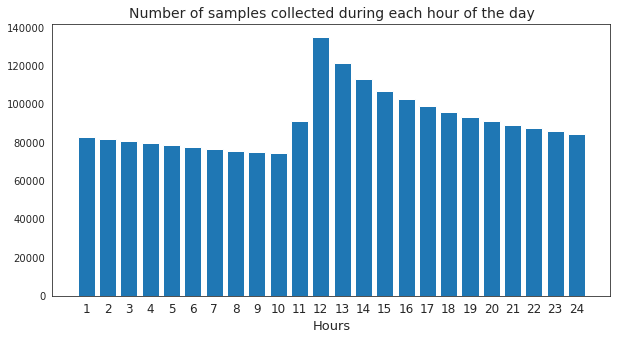

In [20]:
from collections import Counter, OrderedDict
df=dataset
print("Data is collected from "+ str(df.datetime.min()) + " to " + str(df.datetime.max()))

# counts the collected samples in each hour
hours = Counter(df.datetime.dt.hour)
d_hours = OrderedDict(sorted(hours.items(), key=lambda t: t[0]))

x, y = list(d_hours.keys()), list(d_hours.values())
x=[x+1 for x in x]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel('Hours', size = 13)
plt.xticks(x, fontsize = 12)
plt.title('Number of samples collected during each hour of the day', size=14)

let's have a look at the sample frequency distribution - how many rows are in each second.

In [4]:
sample_frequency=dataset.datetime.value_counts().value_counts()
sample_frequency

3     138424
4     105490
2      91757
5      53361
6      29785
1      28959
7      18241
8      12038
9       8410
10      6079
11      4443
12      3478
13      2672
14      2193
15      1732
16      1431
17      1226
18       958
19       810
20       715
21       592
22       489
23       337
24       292
25       221
26       148
27        78
28        50
29        26
30        11
31         5
34         1
Name: datetime, dtype: int64

The frequency mode is 3.  
Seconds with fewer than 6 rows make up 59.43% of our dataset.

let's see the frequency distribution on a graph

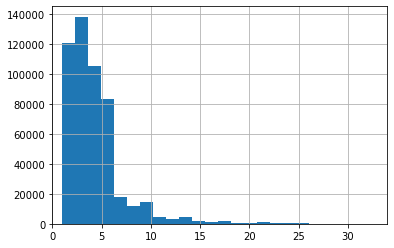

In [5]:
plt.hist(dataset.datetime.value_counts(),bins=25)
plt.xlim(0, 34)
plt.grid(True)
plt.show()

Let's have a look at the histograms for each variable.

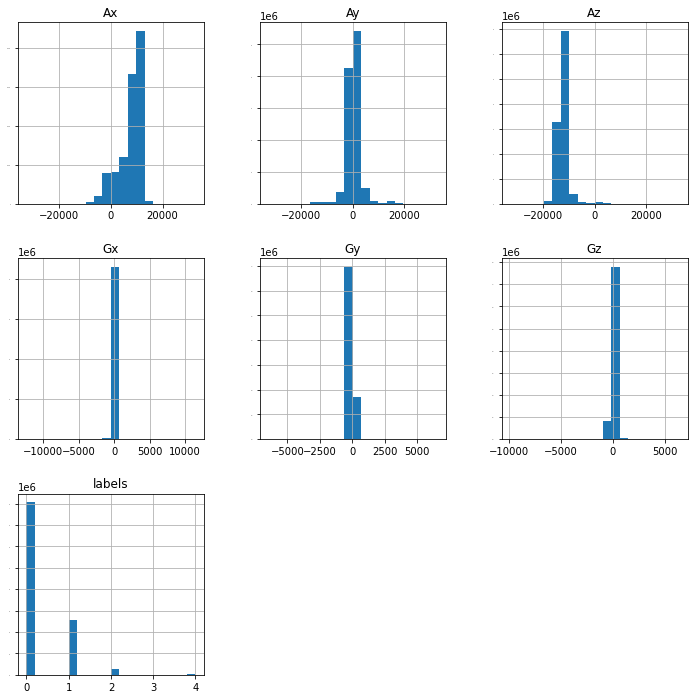

In [6]:
# histograms
dataset.hist(sharex=False,bins=20,sharey=False, xlabelsize=10, ylabelsize=1, figsize=(12,12))
plt.show()

let's have a look at the correlation matrix of the dataset. 



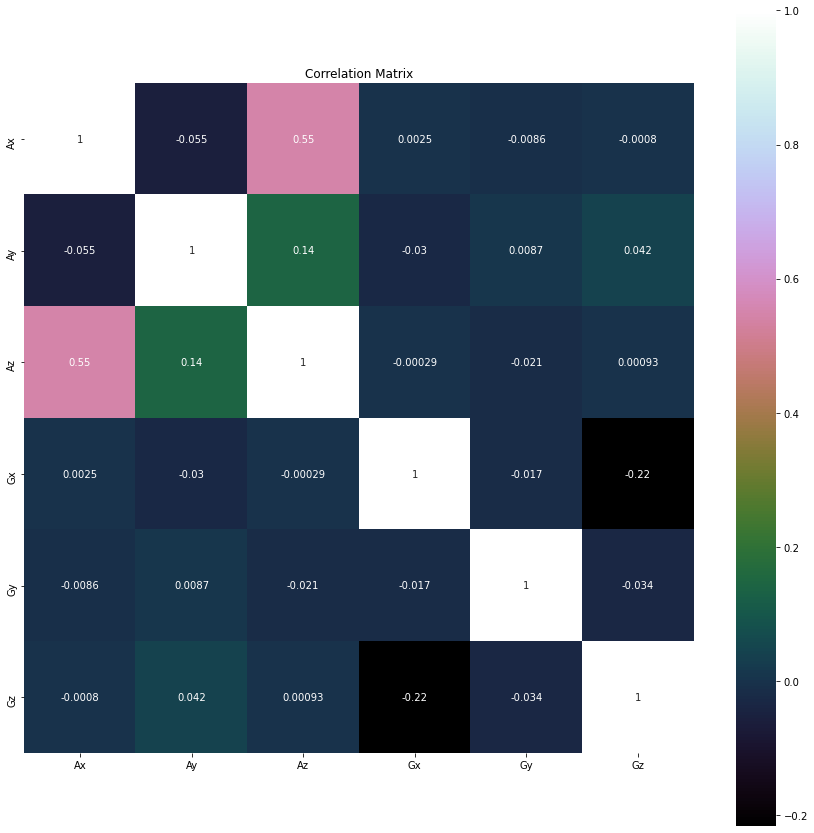

In [7]:
# correlation
correlation = dataset.iloc[:,0:6].corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

From the graph, we can tell that:
1. Ax is postively correlated to Az.
2. Gx is negatively correlated to Gz.

# PART 2 - Introducing 4 possible ways to solve the varying time frequency problem


I have decided to transform each second into a (3,6) constant feature vecotr. As 3 is the mode of frequency in the dataset and 6 is the number of features we have for this dataset.

if we only have two rows available for e.g. 05/11/2020 10:45:24, and we want to create a (3,6) constant feature vector. How can we solve this problem?

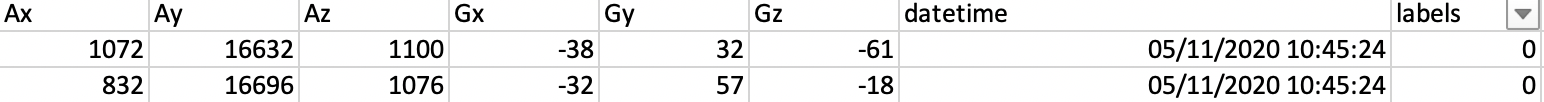

1 - Zero padding method

The final constant feature vector will be a [3,6] vector and  the last row of the vecor will be [0,0,0,0,0,0]

According to Francois Chollet's book - Deep learning with Python: "In general, with neural networks, it’s safe to input missing values as 0, with the condition that 0 isn’t already a meaningful value. The network will learn from exposure to the data that the value 0 means missing data and will start ignoring the value."

To use the zero padding method, we need to first scale the dataset to a range that doesn't include 0, e.g. we can use minmaxscaler from sklearn - MinMaxScaler(feature_range=(1,2)).fit_transform(X) 



2 - The repetition method - repeating the missing rows

The final constant feature vector will be a (3,6) vector and  the last row will be the first row for the second 05/11/2020 10:45:24 -  
[1072, 16632, 1100, -38, 32, 61]

if a second has fewer than 3 rows, then we use repetition to fill the missing rows.
if a second has exactly 3 row, no need to do anything.
if a second has more than 3 rows, take only the first three rows to form the constant feature vector.

3 - The mean value vector method - calculate the mean of all samples in a second 

This method involves calculating the mean of all samples in a second and forming a (1,6) vector. The first and second methods have outperformed the mean value vector method so we will not consider this method in this notebook.


4 - The mode method - predict a lablel for every row with e.g. datetime=2020-11-05 10:45:24, then use the mode label as the final label for 2020-11-05 10:45:24

If we had three rows for 2020-11-05 10:45:24, with labels [0, 0, 1] then 0 will be the final label for 2020-11-05 10:45:24.

if we had four rows for 2020-11-05 10:45:24, with labels[0, 0, 1, 1],then we can calculate the probabilities for each label, sum the probabilities with the same label. The label with the highest probability with be the final prediction label.

Due to time restriction, I havent tested this method yet. But, I personally believe, after using over sampling to make the dataset become balanced. This method should achieve a higher F1 score than the previous 3 methods.




*To conclude,after trying the first, second and third method, the second method(repetition) has outperformed the other two. So in this notebook. I will use the repetition method to process the dataset.*

# PART 3 - Creating the constant feature vector

Creating a constant feature vector for each second.

The process_raw_data function contains 3 different methods we discussed previously for creating the constant feature vector(repetition, 0 padding, mean value vector).

The default method used here is the repetition method. 
To change to method 1 or method 2, just simply delete the comments in the function.

In [5]:
max_row=3
def process_raw_data(dataset):
    X=dataset.iloc[:,0:6]
    scaler = preprocessing.MinMaxScaler(feature_range=(0,1)).fit_transform(X)
    df=pd.DataFrame(scaler,columns=X.columns)
    df=pd.concat([dataset.datetime,df,dataset.labels],axis=1)
    df['vector'] = [[Ax,Ay,Az,Gx,Gy,Gz]for Ax,Ay,Az,Gx,Gy,Gz in zip(df.Ax, df.Ay,df.Az,df.Gx,df.Gy,df.Gz)]
    df=pd.concat([dataset.datetime,df.vector,dataset.labels],axis=1)
    arr_df = df.groupby('datetime')["vector"].apply(list)
    label_df = df.groupby('datetime')["labels"].first()
    df=pd.concat([arr_df,label_df],axis=1)
    df["vector"]=df["vector"].apply(lambda x: np.array(x))
    df["vector"]=df["vector"].apply(lambda x: np.resize(x,(max_row, 6)))        #method 2 - repetition
    #df["vector"].apply(lambda x: x.resize((max_row, 6), refcheck=False))       #method 1 - 0 padding
    #df["vector"]=df["vector"].apply(lambda x: x.mean(axis=0))                  #method 3 - mean value vector
    return df

df=process_raw_data(dataset)
df

,vector,labels
datetime,,
2020-11-05 10:45:24,"[[0.516365300984207, 0.7537956816968032, 0.516...",0
2020-11-05 10:45:25,"[[0.5106889448386358, 0.7455558098725872, 0.51...",0
2020-11-05 10:45:26,"[[0.513191424429694, 0.7520256351567864, 0.517...",0
2020-11-05 10:45:27,"[[0.5147173266193636, 0.7517814908064393, 0.51...",0
2020-11-05 10:45:28,"[[0.5116044861524376, 0.7503166247043564, 0.51...",0
...,...,...
2020-11-11 10:38:45,"[[0.7238269626916914, 0.5068436713206683, 0.63...",0
2020-11-11 10:38:46,"[[0.7243762874799725, 0.5056839856565194, 0.63...",0
2020-11-11 10:38:47,"[[0.7244983596551461, 0.504951552605478, 0.633...",0


Each second in the dataframe is now linked to a (3,6) constant feature vector .

# Part - 4 Transforming the imbalanced dataset into a balanced dataset


Let's have a look at how many samples we have for each label

In [43]:
df.labels.value_counts()


0    379119
1    123247
2     11398
4       688
Name: labels, dtype: int64

As shown above, the dataset is imbalanced, in order to improve the F1 score of our models, we need to transform it into a balanced dataset.

I have considered 4 methods to solve the imbalanced dataset problem. 
1. Under-sampling
2. Over-sampling
3. SMOTE under-sampling
4. SMOTE over-sampling

After trying the four methods above, over-sampling has achieved the highest F1 score, so in this notebook, I will use over sampling to balance to dataset.

n = number of samples belonging to label 0. 
Label 0 contains 379119 samples. So we should incresee the sample size of other labels to 379119 as well.


In [6]:
#implementing over-sampling
n=379119
df_class_0 = df[df['labels'] == 0]
df_class_1 = df[df['labels'] == 1]
df_class_2 = df[df['labels'] == 2]
df_class_4 = df[df['labels'] == 4]

df_class_0_over = df_class_0.sample(n, replace=True)
df_class_1_over = df_class_1.sample(n, replace=True)
df_class_2_over = df_class_2.sample(n, replace=True)
df_class_4_over = df_class_4.sample(n, replace=True)
df=pd.concat([df_class_0_over,df_class_1_over,df_class_2_over,df_class_4_over])


let's have a look at our transformed balanced dataset

Distribution of the Classes in the subsample dataset
4    0.25
2    0.25
1    0.25
0    0.25
Name: labels, dtype: float64


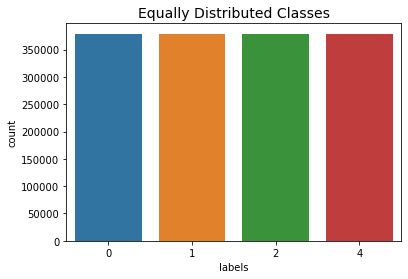

In [11]:
print('Distribution of the Classes in the subsample dataset')
print(df['labels'].value_counts()/len(df))
sns.countplot('labels', data=df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

The data is balanced now, we can use accuracy as our metric, as it focuses on both false positive and false negative.

# PART 5 - Classical machine learning models
Now we have the data processed, we are ready to split the dataset into training and testing sets and develop machine learning models!   HOORAY, the most exciting part!!!

Let's first split the data into training and testing sets. 

Training set = 80% of the dataset
Testing set = 20% of the dataset

setting stratify = y (the label column in our dataframe) to make sure we select equal number of samples from each class.

In [7]:
X=df["vector"]
y=df["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=2,stratify=y)

X_train_final=np.concatenate(X_train.values).reshape(len(X_train),max_row,6)
X_test_final=np.concatenate(X_test.values).reshape(len(X_test),max_row,6)
y_train_final=y_train.values
y_test_final=y_test.values


trainX=X_train_final.reshape(X_train_final.shape[0],X_train_final.shape[1]*X_train_final.shape[2])
trainy=y_train_final
testX=X_test_final.reshape(X_test_final.shape[0],X_test_final.shape[1]*X_test_final.shape[2])
testy=y_test_final

In [8]:
print(trainX.shape,trainy.shape)

(758238, 18) (758238,)


For each second, the model input will be 18 features, which is 3*6. I have considered using PCA to reduce the number of features. But after applying PCA to our data, the models achieved lower accuracy. So in this notebook, I will not use dimensionality redcution alogrithms. 

Now let's test how different models will perform.
The list of models I have considered are:

1. linear discriminant analysis
2. k-nearest neighbors classifier
3. decision tree classifier
4. Gaussian Naive Bayes
5. support vector machine
6. AdaBoost classifier
7. gradient boosting classifier
8. random forest classifier
9. extra-trees classifier

However, gven our data is huge, some of the slower classification algorithms are commented (SVM and gradient boosting classifier)

Note: Due to time restrictions and hardware limitations, only 2% of all data were used to in the cross validation process below to get an overview.
I will use 80% of data as training data after performing cross validation.




In [18]:
#Given Data is huge, some of the slower classification algorithms are commented

scoring="accuracy" 
num_folds=4
models = []

#non-linear models
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))


#Ensemble Models 
models.append(('AB', AdaBoostClassifier()))
#models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))


print(len(models),"models defined")
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, trainX, trainy, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


8 models defined
LDA: 0.431285 (0.005057)
KNN: 0.609140 (0.005944)
CART: 0.683461 (0.004730)
NB: 0.386442 (0.005948)
AB: 0.549723 (0.010053)
GBM: 0.644949 (0.015766)
RF: 0.787853 (0.008538)
ET: 0.797085 (0.009199)


The list above shows the accuracy and standard deviation for each model

Let's compare how different models performed using visualization

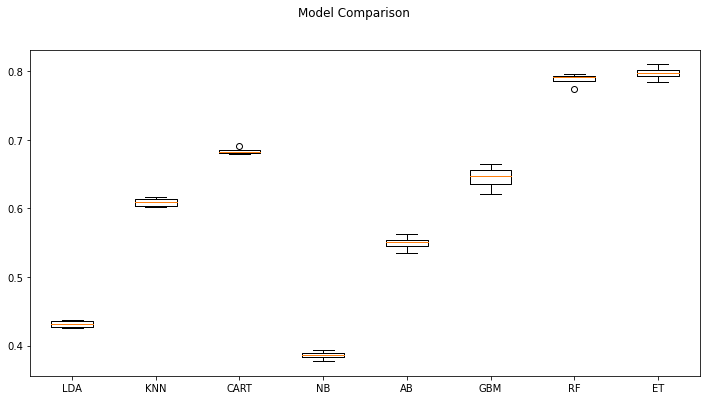

In [19]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(12,6)
plt.show()

As shown on the graph,random forest classifier and extra-trees classifier have outperformed the other models, I will next perform grid search on random forest classifier and extra-trees classifier by varing the number of estimators.



In [20]:
model_params = {
    'Extra_Trees': {
        'model': ExtraTreesClassifier(),
        'params' : {
            'n_estimators': [100,300,500,700],
            
        }  
    },
    
    'Random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,300,500,700]
        }
    }
}


scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(trainX, trainy)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
hyperparameters_frame = pd.DataFrame(scores,columns=['model','best_score','best_params'])
hyperparameters_frame

,model,best_score,best_params
0,Extra_Trees,0.801042,{'n_estimators': 500}
1,Random_forest,0.795371,{'n_estimators': 400}


After performing grid search, extra-tree classifier with n_estimators=500 has achieved the highest accuracy. Let's check how this model will perform on the test dataset.

Here, I will use 80 % of all data as training set.

In [9]:
model=ExtraTreesClassifier(n_estimators=500)
model.fit(trainX,trainy)

predictions = model.predict(testX)

print(accuracy_score(testy, predictions))
print(confusion_matrix(testy, predictions))
print(classification_report(testy, predictions))

0.9711080162165442
[[179160  10385     15      0]
 [ 11504 178053      3      0]
 [     0      0 189559      0]
 [     0      0      0 189559]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94    189560
           1       0.94      0.94      0.94    189560
           2       1.00      1.00      1.00    189559
           4       1.00      1.00      1.00    189559

    accuracy                           0.97    758238
   macro avg       0.97      0.97      0.97    758238
weighted avg       0.97      0.97      0.97    758238



The model has achieved 97% accuracy on the test set.

After increasing the training data to 80%, our model's accuracy has significantly improved compared to the accuracy achieved from cross validation.

Let's have a look at the confusion matrix.

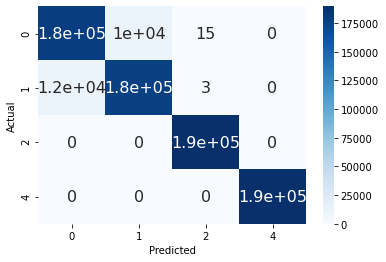

In [10]:
import seaborn as sns
df_cm = pd.DataFrame(confusion_matrix(testy, predictions), columns=np.unique(testy), index = np.unique(testy))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The extra-tree classifier did a good job, it successfully classified all the labels belong to 2 and 4 correctly.

Now we have found out the best performing model.

It's also important to understand how useful each input feature in our model is at predicting the target label.

Let's visualize how important each feauture is on a graph.

Ax1 = Ax in the first row of the (3,6) feature vector

Ax1 Score: 0.07474553373932974
Ay1 Score: 0.06440671225392428
Az1 Score: 0.054398469854432425
Gx1 Score: 0.04722633035994786
Gy1 Score: 0.045263731585380024
Gz1 Score: 0.048741590570137217
Ax2 Score: 0.06998835946907117
Ay2 Score: 0.06525438960126802
Az2 Score: 0.05485726748094004
Gx2 Score: 0.047568505403346596
Gy2 Score: 0.047001631148974876
Gz2 Score: 0.04717423570165668
Ax3 Score: 0.0727302679190638
Ay3 Score: 0.06429095566475324
Az3 Score: 0.05350809761720964
Gx3 Score: 0.04786359817438651
Gy3 Score: 0.04627493294087376
Gz3 Score: 0.048705390515304176


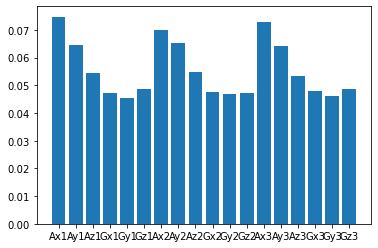

In [22]:
features=["Ax1","Ay1","Az1","Gx1","Gy1","Gz1","Ax2","Ay2","Az2","Gx2","Gy2","Gz2","Ax3","Ay3","Az3","Gx3","Gy3","Gz3"]
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(features[i],"Score:",v)
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in features], importance)
plt.show()

The extra-tree classifier has indentified features from acceleration to be more important than angular velocity

# PART - 6 Deep learning models

In this part, I will test different deep learning models.

1. DNN
2. GRU
3. LSTM

I expected the LSTM model to achieve high accuracy, but unfortunately, the models experienced the vanishing gradients problems. The validation accurracy stops increasing after about 15 epochs . 

I have tried a list of different methods to tackle the vaninshing gradient problem:
1. using the He activation function
2. batch normalization
3. gradient clipping
4. regularization
5. dropout


Out of the 5 methods above, dropout and batch normalization achieved better results than the other methods.

Let's first split the data into training and testing sets.

Training set = 80% of the dataset Testing set = 20% of the dataset

setting stratify = y (the label column in our dataset) to make sure we select equal number of samples from each class.

In [24]:
X=df["vector"]
y=df["labels"]

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,test_size=0.3, random_state=42,stratify=y_train_full)

trainX=np.concatenate(X_train.values).reshape(len(X_train),max_row,6)
validX=np.concatenate(X_valid.values).reshape(len(X_valid),max_row,6)
testX=np.concatenate(X_test.values).reshape(len(X_test),max_row,6)

trainy=y_train.values
validy=y_valid.values
testy=y_test.values

Deep learning model 1 DNN

In [25]:
keras.backend.clear_session()
np.random.seed(25)
tf.random.set_seed(25)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[3, 6]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainX, trainy, epochs=20,batch_size=128, shuffle=True, validation_data=(validX, validy))



Epoch 1/20
5806/5806 [==============================] - 28s 5ms/step - loss: 1.0459 - accuracy: 0.5659 - val_loss: 1.7859 - val_accuracy: 0.4001
Epoch 2/20
5806/5806 [==============================] - 29s 5ms/step - loss: 0.8997 - accuracy: 0.6414 - val_loss: 1.6088 - val_accuracy: 0.3936
Epoch 3/20
5806/5806 [==============================] - 28s 5ms/step - loss: 0.8582 - accuracy: 0.6598 - val_loss: 1.6399 - val_accuracy: 0.3898
Epoch 4/20
5806/5806 [==============================] - 30s 5ms/step - loss: 0.8401 - accuracy: 0.6680 - val_loss: 2.5067 - val_accuracy: 0.3394
Epoch 5/20
5806/5806 [==============================] - 29s 5ms/step - loss: 0.8248 - accuracy: 0.6750 - val_loss: 2.7417 - val_accuracy: 0.3877
Epoch 6/20
5806/5806 [==============================] - 30s 5ms/step - loss: 0.8174 - accuracy: 0.6779 - val_loss: 1.5149 - val_accuracy: 0.4237
Epoch 7/20
5806/5806 [==============================] - 29s 5ms/step - loss: 0.8111 - accuracy: 0.6808 - val_loss: 2.2080 - val_ac

As shown above, even though there is a clear upward trend in our accuracy, but the valid accuracy didnt perform well.

Deep learning model 2 GRU

In [28]:
keras.backend.clear_session()
np.random.seed(25)
tf.random.set_seed(25)

model = keras.models.Sequential([
    keras.layers.GRU(64, return_sequences=True, input_shape=[3, 6]),
    keras.layers.Dropout(0.5),
    keras.layers.GRU(32, return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainX, trainy, epochs=20,batch_size=128, shuffle=True, validation_data=(validX, validy))



Epoch 1/20
5806/5806 [==============================] - 34s 6ms/step - loss: 1.2439 - accuracy: 0.4297 - val_loss: 1.1972 - val_accuracy: 0.4690
Epoch 2/20
5806/5806 [==============================] - 33s 6ms/step - loss: 1.1944 - accuracy: 0.4737 - val_loss: 1.1734 - val_accuracy: 0.4837
Epoch 3/20
5806/5806 [==============================] - 34s 6ms/step - loss: 1.1820 - accuracy: 0.4810 - val_loss: 1.1896 - val_accuracy: 0.4617
Epoch 4/20
5806/5806 [==============================] - 32s 5ms/step - loss: 1.1723 - accuracy: 0.4851 - val_loss: 1.1404 - val_accuracy: 0.5053
Epoch 5/20
5806/5806 [==============================] - 32s 6ms/step - loss: 1.1639 - accuracy: 0.4900 - val_loss: 1.1351 - val_accuracy: 0.5027
Epoch 6/20
5806/5806 [==============================] - 32s 5ms/step - loss: 1.1561 - accuracy: 0.4931 - val_loss: 1.1206 - val_accuracy: 0.5135
Epoch 7/20
5806/5806 [==============================] - 34s 6ms/step - loss: 1.1486 - accuracy: 0.4973 - val_loss: 1.1104 - val_ac

As shown above, the GRU model is performing better than the DNN model, but the validation accuracy is still quite low.

Let's try the LSTM model.

Deep learning model 3 LSTM

In [29]:
keras.backend.clear_session()
np.random.seed(25)
tf.random.set_seed(25)


model = keras.models.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=[3,6]),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(32, return_sequences=False),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dense(5,activation="softmax"),
])


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainX, trainy, epochs=20,batch_size=128, shuffle=True, validation_data=(validX, validy))

Epoch 1/20
5806/5806 [==============================] - 41s 7ms/step - loss: 1.1703 - accuracy: 0.4876 - val_loss: 1.1969 - val_accuracy: 0.4701
Epoch 2/20
5806/5806 [==============================] - 42s 7ms/step - loss: 1.1015 - accuracy: 0.5221 - val_loss: 1.1602 - val_accuracy: 0.5219
Epoch 3/20
5806/5806 [==============================] - 41s 7ms/step - loss: 0.9987 - accuracy: 0.5847 - val_loss: 0.9285 - val_accuracy: 0.6281
Epoch 4/20
5806/5806 [==============================] - 39s 7ms/step - loss: 0.9435 - accuracy: 0.6139 - val_loss: 0.9960 - val_accuracy: 0.5775
Epoch 5/20
5806/5806 [==============================] - 41s 7ms/step - loss: 0.9010 - accuracy: 0.6351 - val_loss: 1.0266 - val_accuracy: 0.5721
Epoch 6/20
5806/5806 [==============================] - 41s 7ms/step - loss: 0.8702 - accuracy: 0.6497 - val_loss: 1.2146 - val_accuracy: 0.5364
Epoch 7/20
5806/5806 [==============================] - 39s 7ms/step - loss: 0.8438 - accuracy: 0.6621 - val_loss: 0.9632 - val_ac

The LSTM model has achieved higher validation accuracy than the other two models. Let's see how the LSTM model will perform on the test set.

In [30]:
model.evaluate(testX,testy)

14217/14217 [==============================] - 43s 3ms/step - loss: 0.8586 - accuracy: 0.6542


[0.8585541248321533, 0.6542423963546753]

In [36]:
y_pred=model.predict(testX)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(testy, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.36      0.48    113736
           1       0.57      0.65      0.61    113735
           2       0.60      0.87      0.71    113736
           4       0.82      0.73      0.77    113736

    accuracy                           0.65    454943
   macro avg       0.67      0.65      0.64    454943
weighted avg       0.67      0.65      0.64    454943



The accuracy is much lower compared to our extra-tree classifier.

(accuracy,F1 score) for LSTM on test set : (0.65, 0.64)

(accuracy,F1 score) for extra-tree classifier on test set : (0.97, 0.97)



# PART 7 - Conclusion and future improvements

To conclude, after testing 9 classical machine learning models and 3 deep learning models, extra-tree classifier has achieved the best accuracy and f1 score. I believe there are still improvements that can de done to make the model perform better. After conducting research on how to solve the varing length time series problem, I found a research paper "Time series classification for varying length series" by Chang Wei Tan, Francois Petitjean, Eamonn Keogh, Geoffrey I. Webb. In this paper, the authors talked about 3 different techniques which could be applied to our problem:

1. Uniform scaling 
2. Low amplitude noise padding at the prefix and suffix of the time series
3. Single zero padding at the prefix and suffix of the time series

Even though, the authors didnt publish the code for implementing the techniques above. But if given more time, I would definitely like to explore these techniques.


List of possible future improvements:
1. use techniques from "Time series classification for varying length series" to create the constant feature vector
2. use method 4 (the mode) instead of the repetition method to create the constant feature vector
3. test how CNN models would perform
4. adjust the LSTM model ( I believe the LSTM model would perform better if uniform scaling was used to create the constant vector)